# Load the Trained Model

In [29]:
from tensorflow import keras

model = keras.models.load_model('../models/fraud_detection_model.h5')


# Evaluate the Model

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load Credit Card Fraud Detection dataset
data = pd.read_csv('../data/creditcard.csv')

# Split data in features and labels
X = data.drop('Class', axis=1)
y = data['Class']

# Split data to training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [39]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, average_precision_score

# Make predictions on the testing dataset
y_pred = model.predict(X_test)

# Convert probabilities to binary labels (0 or 1) using a threshold (e.g., 0.5)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)

# Print a classification report
classification_rep = classification_report(y_test, y_pred_binary)

# Calculate ROC-AUC and AUPRC scores
roc_auc = roc_auc_score(y_test, y_pred)
auprc = average_precision_score(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)
print(f"\nROC-AUC Score: {roc_auc:.4f}")
print(f"AUPRC Score: {auprc:.4f}")


1781/1781 [==============================] - 1s 536us/step
Confusion Matrix:
 [[56853    11]
 [   20    78]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.80      0.83        98

    accuracy                           1.00     56962
   macro avg       0.94      0.90      0.92     56962
weighted avg       1.00      1.00      1.00     56962


ROC-AUC Score: 0.9672
AUPRC Score: 0.8526


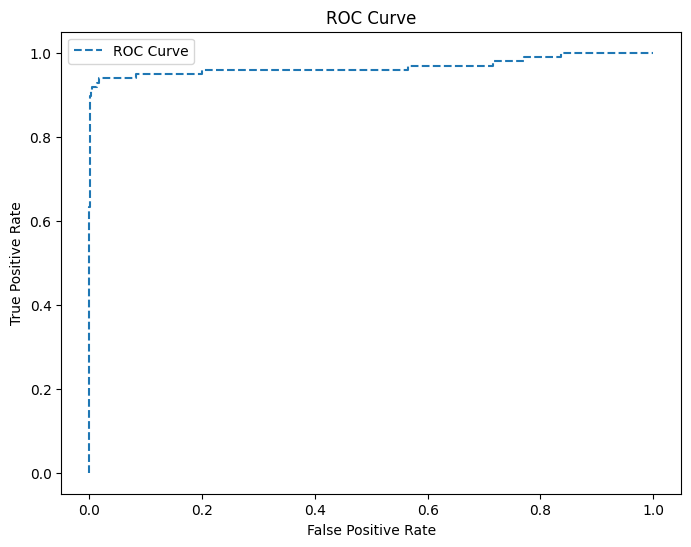

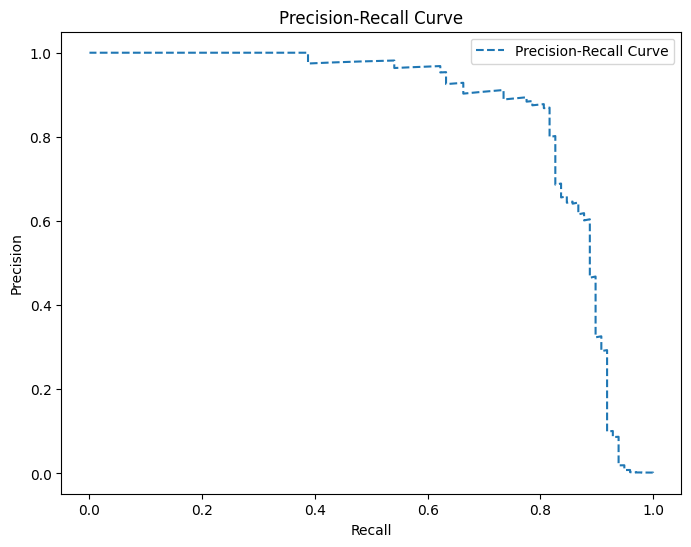

In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linestyle='--', label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, linestyle='--', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()
